何次の多項式で求めますか?(数値を入力)： 3


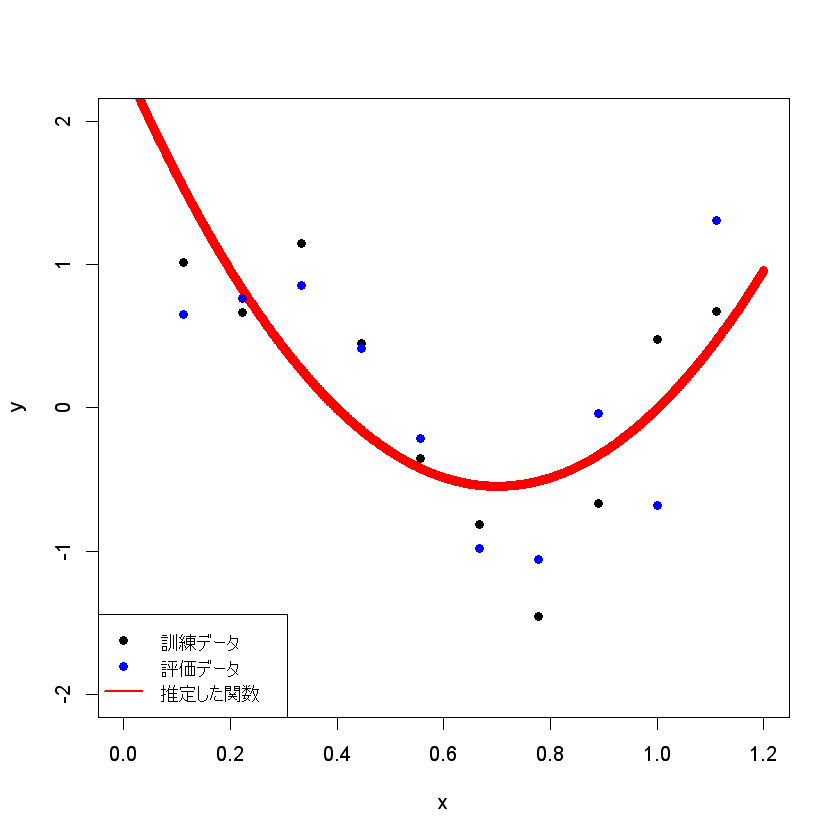

In [1]:
# source('~/R/my_function.R', echo=TRUE)
# clearAll()
#コメントの付け方 ctrl+SHIFT+c

m = readline("何次の多項式で求めますか?(数値を入力)：")
m = as.integer(m)#次数
training = read.table("training.txt")
test = read.table("evaluation.txt")
x_test = test$V1#評価データのxの値
y_test = test$V2#評価データのyの値

x = training$V1#訓練データのxの値
y = training$V2#訓練データのyの値
plot(x, y, xlim = c(0,1.2), ylim = c(-2, 2), 
     xlab = "x", ylab = "y", col = "black", pch = 16, lwd = 2)
X = matrix(nrow = length(x), ncol = m)

for(i in 1:m){
    X[, i] = x^(i-1)
}

beta_hat = solve((t(X) %*% X)) %*% t(X) %*% y


f = function(x){
    ans = 0
    for(i in 1:m){
        ans = ans + beta_hat[i, 1] * x^(i-1)   
    }
    return(ans)
}

y_hat = c()
new_x = seq(0, 1.2, length.out = 1000)
for(i in 1:length(new_x)){
    y_hat[i] = f(new_x[i])
}

par(new = TRUE)
plot(new_x, y_hat,  xlim = c(0,1.2), ylim = c(-2, 2),
     xlab = "x", ylab = "y", col = "red", pch = 16, lwd = 2)

par(new = TRUE)
plot(x_test, y_test,  xlim = c(0,1.2), ylim = c(-2, 2),
     xlab = "x", ylab = "y", col = "blue", pch = 16, lwd = 2)


legend("bottomleft", lty = c(NA, NA, 1),
       c("訓練データ", '評価データ','推定した関数'),
       pch = c(16, 16, NA),
       col = c("black", "blue", "red"), lwd = 2, cex = 1.0) 
